# Chapter 6. 분류 및 군집분석

> [분석스토리]  
병아리가 무럭무럭 자라고 있을 무렵, 김 대표는 병아리 감별사에게 암수 구별을 요청했습니다. 하지만 병아리 감별사의 시급이 너무 높아 전체 병아리의 암수 구별을 맡길 순 없었고, 제한된 예산 내에서 어렵사리 60마리만 암수를 구분할 수 있었습니다. 나머지 병아리들의 암수는 곁눈질로 배운 김 대표가 직접 구별해 보려고 하는데 과연 김 대표는 그 어렵다는 병아리의 암수를 구분해 낼 수 있을까요?

## 1. 병아리의 성별을 구분할 수 있을까? (로지스틱 회귀)

### 1-1. 로지스틱 회귀란?

> 로지스틱 회귀(Logistic Regression)는 이름에 회귀가 들어가서 앞서 배운 선형 회귀와 비슷한 유형으로 인식할 수 있으나 전혀 다른 방법론입니다. 로지스틱 회귀는 독립변수(x)의 선형 결합을 이용해 사건의 발생 가능성(확률)을 예측하는 데 사용되는 기법입니다. 종속변수(y)가 수치형인 아닌 이산형(0 또는 1)일 경우 사용하며 종속변수가 2개 이상의 범주를 갖는 경우에도 활용할 수 있습니다.
로지스틱 회귀의 결과는 사건이 일어날 확률(Y = 1)로 나타내기 때문에 다음과 같은 수식과 그래프로 모델이 표현될 수 있습니다.

> $$ P(Y=1|x) = {1 \over {1+e^-(α+β_1x_1+β_2x_2+...+β_nx_n)}} $$

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png" width="500"/>
    <center>로지스틱 함수(Sigmoid 함수) 그래프(출처 : wikipedia)</center>
</div>

### 1-2. 데이터 불러와서 확인하기

In [1]:
import pandas as pd
g = pd.read_csv("ch6-1.csv")

In [2]:
g.head()

,wing_length,tail_length,gender
0,44,9,m
1,42,9,m
2,43,8,m
3,40,10,m
4,44,8,m


In [3]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   gender       60 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [4]:
# gender 변수의 값 m을 1로, f를 0으로 변경
g['gender'] = g['gender'].map({'m':1, 'f':0})
g.head()

,wing_length,tail_length,gender
0,44,9,1
1,42,9,1
2,43,8,1
3,40,10,1
4,44,8,1


### 1-3. 로지스틱 회귀

In [5]:
# 로지스틱 회귀 구현을 위한 모듈 불러오기
import statsmodels.api as sm
# 모델 구축 및 학습
model_glm = sm.Logit.from_formula('gender ~ wing_length + tail_length', data = g).fit()

Optimization terminated successfully.
         Current function value: 0.137215
         Iterations 9


In [6]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                   60
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Mar 2022   Pseudo R-squ.:                  0.8020
Time:                        17:36:15   Log-Likelihood:                -8.2329
converged:                       True   LL-Null:                       -41.589
Covariance Type:            nonrobust   LLR p-value:                 3.264e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      70.1955     23.410      2.999      0.003      24.313     116.078
wing_length    -1.0531      0.505     -2.087      0.037      -2.042      -0.064
tail_length    -2.3859      0.969     -2.462      0.014      -4.285      -0.486
===============================================================================
"""

### 1-4. 분류 알고리즘의 성능 평가방법

> 분류 알고리즘의 경우 일반적으로 정오분류표(Confusion Matrix)와 ROC 커브(Receiver Operation Characteristic Curve)의 밑부분 넓이인 AUC(Area Under the ROC Curve)를 이용해 성능을 평가합니다.
  https://en.wikipedia.org/wiki/Confusion_matrix

### 1-5. 로지스틱 회귀모델의 성능 평가

In [7]:
# predict() 메서드를 이용해 예측값(확률) 생성
y_prob = model_glm.predict(g.iloc[:,0:2])

In [8]:
# 예측값(확률) 확인
y_prob.head()

0    0.915579
1    0.988904
2    0.997049
3    0.985377
4    0.991588
dtype: float64

In [9]:
# 예측값 확률을 반올림을 통해 1과 0으로 표현 후 list 타입으로 변경
y_pred = list(map(round, y_prob))

In [10]:
# 예측값(클래스) 확인
y_pred[0:5]

[1, 1, 1, 1, 1]

In [11]:
# 기존값인 gender열을 별도 y로 저장
y = g['gender']

In [12]:
# 정오분류표 함수 불러오기
from sklearn.metrics import confusion_matrix

In [13]:
# 분류결과 평가, 1을 기준으로 
confusion_matrix(y, y_pred, labels = [1,0])

array([[28,  2],
       [ 1, 29]], dtype=int64)

In [14]:
# 분류리포트 함수 불러오기
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [16]:
# ROC 커브를 그리기 위한 함수 불러오기
from sklearn.metrics import roc_curve

In [17]:
# ROC 커브를 그리기 위한 변수 설정
fpr, tpr, thresholds = roc_curve(y, y_prob)

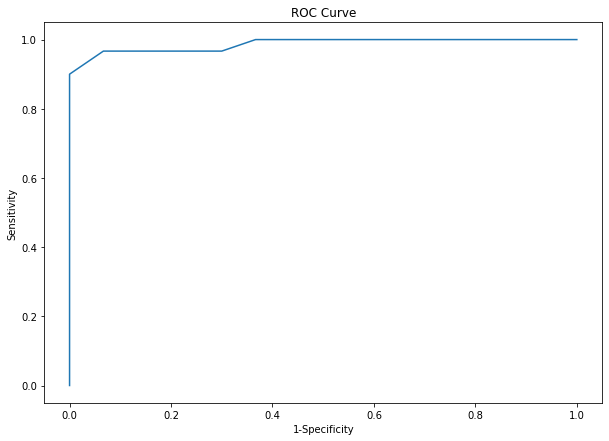

In [18]:
# ROC 커브 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [19]:
# AUC 계산을 위한 함수 불러오기
from sklearn.metrics import auc

In [20]:
# AUC 계산
auc(fpr, tpr)

0.9866666666666667

---

## 2. 병아리의 품종을 구분할 수 있을까? (분류 알고리즘)

> [분석 스토리]  
무럭무럭 잘 자라고 있는 병아리들을 관찰하던 어느 날, 김 대표는 뭔가 특이한 점을 발견했습니다. 병아리가 성장함에 따라 생김새가 변하겠지만 병아리들마다 날개 길이, 꽁지깃 길이, 볏의 높이가 유난히 차이가 나 보였습니다. 불안한 마음에 사진을 찍어 종란 판매업체 담당자에게 이 병아리들이 같은 품종이 맞는지 문의했습니다. 그리고 담당자에게서 온 답변은 김 대표를 매우 혼란스럽게 만들었습니다. 종란 판매 직원의 실수로 주문을 넣었던 A 품종의 종란뿐만 아니라 B와 C라는 2가지 품종의 종란이 섞여서 납품되었다는 것입니다. 졸지에 3가지 품종의 병아리를 키우게 된 김 대표는 판매처에 클레임(claim)을 제기했고, 종란 판매처의 품종 엔지니어가 김 대표의 양계농장에 급파되었습니다. 엔지니어는 하루에 걸쳐 총 300마리의 병아리 품종을 정확히 구분해 기록했습니다. 김 대표는 다음에도 혹시나 이런 일이 발생할지 모른다는 불안감에 이 300마리의 병아리 데이터를 활용해 품종을 구분할 수 있는 분류 모델을 개발해 보려고 합니다. 과연 그는 암수를 구분했던 것처럼 품종도 잘 구분해낼 수 있을까요?

### 2-1. 다양한 분류 알고리즘

### 2-2. 나이브 베이즈 분류

> 나이브 베이즈 분류(Naïve Bayes Classification)는 베이즈 정리를 적용한 확률 분류 기법입니다. 베이즈 정리는 쉽게 말해 조건부 확률을 구하는 공식으로 생각하면 됩니다. 조건부 확률은 사건 B가 일어났다는 조건하에 사건 A가 일어날 확률을 P(A|B)라고 표현하는데 사후확률(posterior)이라고도 합니다. 식으로 나타내면 다음과 같습니다.
  
> $$ P(A|B) = {P(A \cap B) \over P(B)} = {P(B|A)P(A) \over P(B)} = posterior = {likelihood×prior \over evidence} $$
  
> 여기서 P(A), P(B)는 각각 사건 A, B가 일어날 확률이고, P(B|A)는 사건 A가 일어난다는 조건하에 사건 B가 일어날 확률을 나타내며 우도(likelihood)라고 부릅니다. 베이즈 정리는 사건 B가 발생(P(B)=1)함으로써 사건 A가 발생할 확률이 어떻게 변하는지를 표현한 식으로 B라는 사건을 관찰해 A라는 사건에 어떤 영향을 미치는지 찾아내는 방법이라고 이해하면 될 것 같습니다.

In [21]:
# 실습용 데이터 불러오기
import pandas as pd
df_train = pd.read_csv('ch6-2_train.csv')
df_test = pd.read_csv('ch6-2_test.csv')

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  240 non-null    int64 
 1   tail_length  240 non-null    int64 
 2   comb_height  240 non-null    int64 
 3   breeds       240 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.6+ KB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   comb_height  60 non-null     int64 
 3   breeds       60 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [24]:
df_train.head()

,wing_length,tail_length,comb_height,breeds
0,238,63,34,a
1,236,67,30,a
2,256,65,34,a
3,240,63,35,a
4,246,65,30,a


In [25]:
# train, test 데이터셋 각각 x, y로 분할, ndarray 타입
x_train = df_train.iloc[:,0:3].values
y_train = df_train.iloc[:,3].values
x_test = df_test.iloc[:,0:3].values
y_test = df_test.iloc[:,3].values

In [26]:
# 나이브베이즈 알고리즘 수행을 위한 함수 불러오기
from sklearn.naive_bayes import GaussianNB

In [27]:
# 모델 구축 및 학습
model_nb = GaussianNB().fit(x_train, y_train)

In [28]:
# 예측값 생성
y_pred_nb = model_nb.predict(x_test)

In [29]:
# 예측값 확인
y_pred_nb

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'b',
       'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1')

In [30]:
# 예측 결과 평가
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_nb)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]], dtype=int64)

In [31]:
# 예측 결과 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 2-3. k-NN

> k-최근접 이웃(k-NN, k-Nearest Neighbor)은 가장 간단한 머신러닝 알고리즘으로 새로운 데이터에 대해 이와 가장 거리가 가까운 k개의 과거 데이터의 결과를 이용해 다수결로 분류하는 방법입니다. 다음 그림을 보면 이해가 쉬울 것입니다.
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/558px-KnnClassification.svg.png" width="500"/>
    <center>k-NN 알고리즘(출처 : wikipedia)</center>
</div>

> 원(●)은 새로운 데이터인데, 과거 데이터를 이용해 네모(■) 또는 세모(▲)로 분류하고자 합니다. 실선으로 된 원은 k가 3개인 경우입니다. 이때에는 실선 원 안에 네모(■) 1개, 세모(▲) 2개가 있습니다. 이 경우 원(●)은 다수결에 의해 개수가 더 많은 세모(▲)로 분류됩니다. 점선으로 된 원은 k가 5개인 경우입니다. 이때에는 점선 안에 네모(■) 3개, 세모(▲) 2개가 있습니다. 이 경우 원(●)은 다수결에 의해 개수가 더 많은 네모(■)로 분류됩니다.  
이렇게 k값의 선택에 따라 새로운 데이터에 대한 분류 결과가 달라지며, 종속변수의 형태(범주형 또는 연속형)에 따라 분류(classification)와 회귀(regression) 모두에 사용할 수 있습니다. 그리고 새 데이터에 더 가까운 이웃일수록 더 먼 이웃보다 평균에 더 많이 기여하도록 이웃의 기여에 가중치(weight)를 줄 수 있습니다. 예를 들어, 이웃까지의 거리가 d라면 해당 이웃들에게는 거리의 반비례인 1/d만큼의 가중치를 부여할 수 있습니다.

In [32]:
# k-NN 알고리즘 수행을 위한 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# 모델 구축(k=3) 및 학습
model_knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train,y_train)

In [34]:
y_pred_knn = model_knn.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_knn)

array([[19,  1,  0],
       [ 1, 16,  3],
       [ 0,  1, 19]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.89      0.80      0.84        20
           c       0.86      0.95      0.90        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [37]:
# 모델 구축(k=5) 및 학습
model_knn5 = KNeighborsClassifier(n_neighbors = 5).fit(x_train,y_train)

In [38]:
y_pred_knn5 = model_knn5.predict(x_test)

In [39]:
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_knn5)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  2, 18]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred_knn5))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.89      0.85      0.87        20
           c       0.90      0.90      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



### 2-4. 의사결정나무

> 의사결정나무(Decision Tree)는 주어진 독립변수에 의사결정규칙을 적용해 나가면서 종속변수를 예측해 나가는 알고리즘입니다. 종속변수가 범주형이나 연속형인 경우 모두 사용할 수 있고, 분석 결과가 조건 형태로 출력되기 때문에 모델을 이해하기가 쉽습니다.  
다음은 타이타닉호에서 생존 여부(종속변수)를 성별, 나이, 함께 탑승한 형제 또는 배우자수(sibsp)와 같은 다양한 독립변수에 의사결정규칙을 적용해 트리 형태로 나타낸 의사결정나무 모델입니다.  
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/fe/CART_tree_titanic_survivors_KOR.png" width="500"/>
    <center>의사결정나무 알고리즘(출처 : wikipedia)</center>
</div>

> 위 그림에서 마름모 형태로 표현되는 노드를 의사결정 노드(Decision Node)라고 하고, 타원 형태로 표현되는 노드를 잎사귀 노드(Leaf Node)라고 합니다. 의사결정 노드 중 최초로 분류가 시작되는 최상단의 노드를 뿌리 노드(Root Node)라고 합니다.  
의사결정나무는 종속변수가 범주형인 경우 분류나무(Classification Tree), 연속형인 경우 회귀나무(Regression Tree)로 구분되며, 의사결정규칙(가지를 분할할 때)을 만들 때 기준이 될 독립변수 항목과 값을 선택하는 방법으로 분류나무는 χ2 통계량의 p값, 지니 지수(Gini Index), 엔트로피 지수(Entropy Index) 등을 사용하고, 회귀나무는 F 통계량의 p값, 분산의 감소량 등을 사용합니다.  
의사결정나무 알고리즘에는 CART, CHAID, ID3, C4.5, C5.0, MARS 등의 다양한 방법론이 존재합니다. sklearn 패키지는 최적화된 버전의 CART(Classification And Regression Tree) 알고리즘을 이용합니다.

In [41]:
# 의사결정나무 알고리즘 수행 및 시각화를 위한 함수 불러오기
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
# 모델 구축 및 학습
model_tree = DecisionTreeClassifier().fit(x_train, y_train)

In [43]:
y_pred_tree = model_tree.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_tree)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  4, 16]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.82      0.90      0.86        20
           c       0.94      0.80      0.86        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [46]:
# 모델 구축(분할기준:entropy) 및 학습
model_tree2 = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

In [47]:
y_pred_tree2 = model_tree2.predict(x_test)

In [48]:
confusion_matrix(y_test, y_pred_tree2)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  2, 18]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred_tree2))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



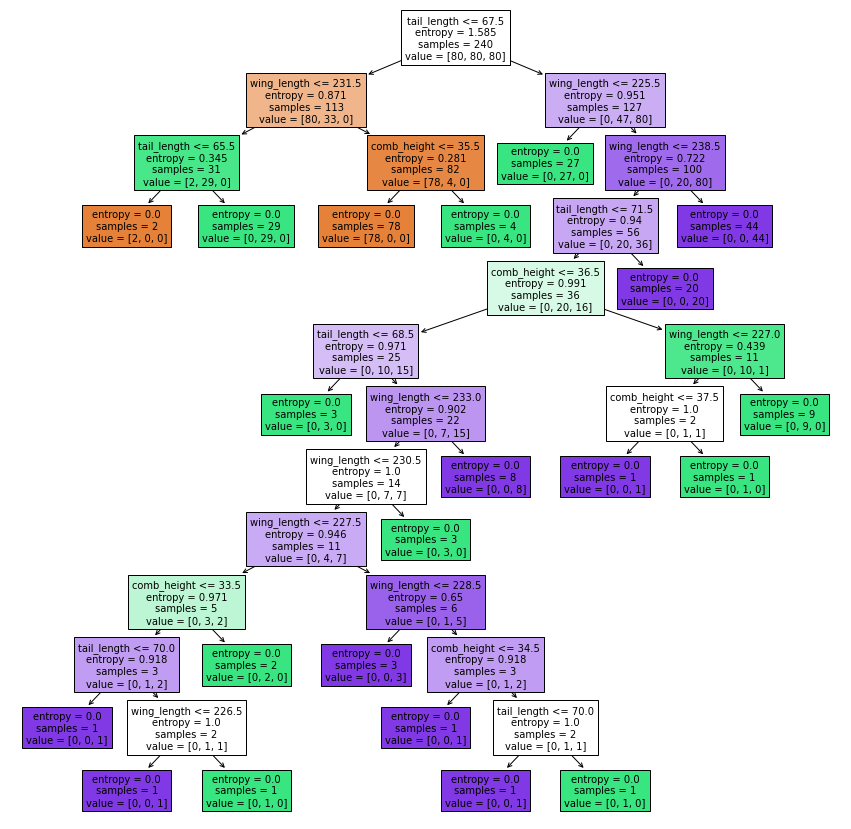

In [50]:
# 트리 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(model_tree2, feature_names = ['wing_length','tail_length','comb_height'], filled = True)
plt.show()

In [51]:
# 모델 구축(분할기준:entropy, 최대깊이:3) 및 학습
model_tree3 = DecisionTreeClassifier(criterion='entropy', max_depth = 3).fit(x_train, y_train)

In [52]:
y_pred_tree3 = model_tree3.predict(x_test)

In [53]:
confusion_matrix(y_test, y_pred_tree3)

array([[20,  0,  0],
       [ 1, 14,  5],
       [ 0,  2, 18]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred_tree3))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.88      0.70      0.78        20
           c       0.78      0.90      0.84        20

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.86        60
weighted avg       0.87      0.87      0.86        60



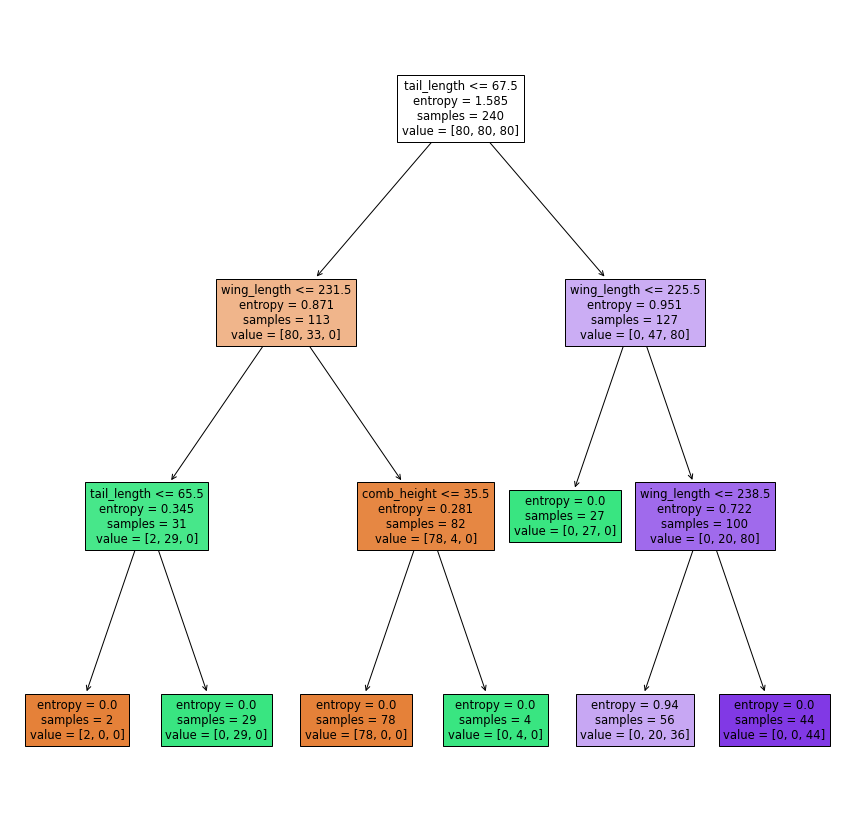

In [55]:
# 트리 그리기
plt.figure(figsize=(15,15))
plot_tree(model_tree3, feature_names = ['wing_length','tail_length','comb_height'], filled = True)
plt.show()

> ※ 불순도와 정보이득  
분류트리의 분할기준(criterion)인 지니(Gini) 또는 엔트로피(Entropy) 지수는 불순도(impurity)를 측정하는 방법입니다. 의사결정나무 알고리즘은 부모와 자식 노드의 불순도 차이가 크도록 트리를 성장시키는데 여기서 불순도 차이를 정보이득(information gain)이라고 부릅니다. 불순도와 정보이득을 계산하는 방법은 다음과 같습니다.  
>* 지니 불순도  $$1-\sum_{i=1}^n(p_i)^2 \; (p_i : i\;클래스로 \;분류되는 확률)$$
>* 엔트로피 불순도  $$-\sum_{i=1}^n(p_i)log_2(p_i) \; (p_i : i\;클래스로 \;분류되는 확률)$$
>* 정보이득  $$부모노드 \; 불순도 - \sum_{i=1}^n(m_i) \; (m_i : i\;클래스 \; 자식 노드의 \;가중 평균 \;불순도)$$

### 2-5. 배깅(Bagging)

> 배깅(Bagging)은 앙상블(Ensemble) 모형 중 하나입니다. 앙상블은 프랑스어로 “통일” 또는 “조화”를 의미하는 용어입니다. 이런 의미처럼 앙상블 모형은 여러 개의 예측 모델을 만든 후 조합해 하나의 최적화된 최종 예측 모델을 만듭니다. 앙상블 모형은 분류와 회귀 모두에 사용할 수 있는 알고리즘입니다.  
앙상블 모형에는 배깅과 부스팅(Boosting)이 있습니다. 배깅은 Bootstrap Aggregating의 줄임말로 학습 데이터 셋으로부터 동일한 크기의 표본을 단순 랜덤 복원 추출해 여러 개 만들고, 각 표본에 대한 예측 모델을 생성한 후 결합해 최종 예측 모델을 만드는 알고리즘입니다. 여기서 학습 데이터 셋에서 단순 랜덤 복원 추출해 동일한 크기의 표본을 여러 개 만드는 샘플링 방법을 부트스트랩(Bootstrap)이라고 합니다.

In [56]:
# 배깅 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import BaggingClassifier

In [57]:
# 모델 구축 및 학습
model_bag = BaggingClassifier().fit(x_train, y_train)

In [58]:
y_pred_bag = model_bag.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_bag)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  1, 19]], dtype=int64)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



### 2-6. 부스트

> 부스팅(Boosting)은 앙상블 모형 중 하나로 배깅이 부트스트랩 시 각 표본에 동일한 확률을 부여하는 것과 달리 잘못 분류된 표본에 더 큰 가중치를 적용해 새로운 분류 규칙을 만들고, 이런 과정을 반복해 최종 모형을 만드는 알고리즘입니다. 부스팅은 최근까지도 AdaBoost(Adaptive Boosting), GBM(Gradient Boosting Machine)과 같은 알고리즘이 나오면서 배깅보다 성능이 뛰어난 경우가 많습니다. 특히 XGBoost의 경우 캐글(Kaggle)에서 상위 랭커들이 사용해 높은 인기를 얻은 알고리즘입니다.

① 에이다부스트

In [61]:
# 에이다부스트 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import AdaBoostClassifier

In [62]:
# 모델 구축 및 학습
model_adb = AdaBoostClassifier().fit(x_train, y_train)

In [63]:
y_pred_adb = model_adb.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_adb)

array([[20,  0,  0],
       [ 1, 16,  3],
       [ 0,  1, 19]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.80      0.86        20
           c       0.86      0.95      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



② 그래디언트부스트

In [66]:
# 그래디언트부스트 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
# 모델 구축 및 학습
model_gb = GradientBoostingClassifier().fit(x_train, y_train)

In [68]:
y_pred_gb = model_gb.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_gb)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  2, 18]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 2-7. 랜덤포레스트

> 랜덤 포레스트(Random Forest)는 배깅(Bagging)을 적용한 의사결정나무(Decision Tree)의 앙상블 알고리즘입니다. 랜덤 포레스트는 나무(tree)가 아니라 나무가 모인 숲(forest)의 수준으로 하나의 트리 모델이 아닌 다수의 부트스트랩 표본으로 트리 모델을 만든 후 그 결과를 취합해 분류(classification)의 경우에는 다수결로, 회귀(regression)의 경우에는 평균을 출력합니다. 이는 배깅과 동일한 방법이나 트리 모델의 분할 기준(노드)을 정하는 방법에서 차이가 있습니다.  
배깅은 노드(node)마다 모든 독립변수 내에서 최적의 분할을 찾는 방법을 사용하지만, 랜덤 포레스트는 독립변수들을 무작위(random)로 추출하고, 추출된 독립변수 내에서 최적의 분할을 만들어 나가는 방법을 사용합니다.  
일반적으로 하나의 트리 모델에서 발생할 수 있는 과적합(overfitting) 문제가 랜덤 포레스트에서는 줄어들고, 예측 성능 또한 높게 나옵니다.

In [71]:
# 랜덤포레스트 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import RandomForestClassifier

In [72]:
# 모델 구축 및 학습
model_rf = RandomForestClassifier().fit(x_train, y_train)

In [73]:
y_pred_rf = model_rf.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_rf)

array([[19,  1,  0],
       [ 1, 18,  1],
       [ 0,  1, 19]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.90      0.90      0.90        20
           c       0.95      0.95      0.95        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



> ※ 예측결과를 확률로 출력하는 방법  
sklearn 패키지의 분류 알고리즘을 이용해 모델을 만들어 학습(fit)시킨 후 일반적으로 predict() 메소드를 이용해 예측결과를 클래스 형태로 출력하지만, predict_proba() 메소드를 이용하면 확률 형태로도 출력할 수 있습니다.  
(예시)  
y_prob_rf = model_rf.predict_proba(x_test)  
y_prob_rf[0:5]

### 2-8. 서포트벡터머신

> 서포트 벡터 머신(SVM, Support Vector Machine)은 고차원의 공간에서 최적의 분리 초평면(hyperplane)을 찾아 이를 이용해 분류(classification)와 회귀(regression)를 수행하는 알고리즘입니다.

In [76]:
# 서포트 벡터머신 알고리즘 수행을 위한 함수 불러오기
from sklearn.svm import SVC

In [77]:
# 모델 구축(kerner:linear) 및 학습
model_svm = SVC(kernel = 'linear').fit(x_train, y_train)

In [78]:
y_pred_svm = model_svm.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_svm)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]], dtype=int64)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



In [81]:
# 예측값을 데이터프레임으로 만들고, 컬럼명을 breeds_pred로 지정
df_y_pred_svm = pd.DataFrame(y_pred_svm, columns = ['breeds_pred'])

In [82]:
# 기존 test 데이터 셋에 svm 예측 결과 열합치기
df_svm = pd.concat([df_test, df_y_pred_svm], axis = 1)

In [83]:
df_svm.head()

,wing_length,tail_length,comb_height,breeds,breeds_pred
0,258,67,32,a,a
1,260,64,34,a,a
2,251,63,31,a,a
3,248,63,30,a,a
4,254,62,32,a,a


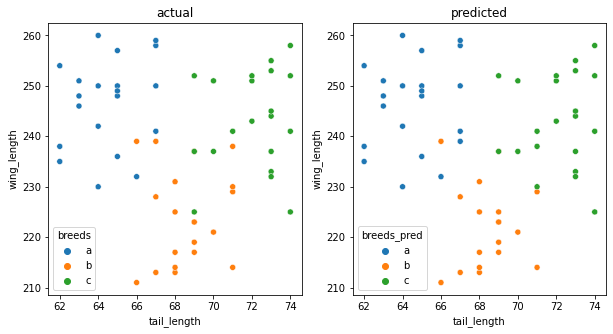

In [84]:
# 실제값 및 예측값 시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df_svm, x='tail_length', y='wing_length', hue='breeds', style='breeds')
plt.title('actual')
plt.subplot(1, 2, 2)
sns.scatterplot(data = df_svm, x='tail_length', y='wing_length', hue='breeds_pred', style='breeds_pred')
plt.title('predicted')
plt.show()

### 2-9. XGBoost

① XGBoost

In [85]:
# xgboost 패키지 설치(anaconda 기본 패키지가 아님)
!pip install xgboost

In [86]:
# XGBoost 알고리즘 수행을 위한 함수 불러오기
from xgboost import XGBClassifier

In [87]:
# 모델 구축 및 학습
model_xgb = XGBClassifier().fit(x_train, y_train)

[17:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [88]:
y_pred_xgb = model_xgb.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_xgb)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  1, 19]], dtype=int64)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



② 그리드서치를 이용한 하이퍼 파라미터 튜닝

In [91]:
# 그리드서치 함수 불러오기
from sklearn.model_selection import GridSearchCV

In [92]:
# 그리드서치로 실행할 하이퍼 파라미터 딕셔너리 타입으로 저장
xgb_param_grid = {
    'eta' : [0.05, 0.1, 0.3, 0.5],
    'gamma' : [0, 0.5, 1, 2],
    'max_depth' : [2, 4, 8, 12]
}

In [93]:
# 평가기준이 정확도인 그리드서치 모델 구축(n_jobs=-1은 모든 CPU 코어를 사용하라는 의미) 
xgb_grid = GridSearchCV(XGBClassifier(), param_grid = xgb_param_grid, n_jobs=-1, scoring = 'accuracy')

In [94]:
# 그리드서치 모델 학습
xgb_grid.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [95]:
# 정확도 최고 점수
xgb_grid.best_score_

0.9541666666666666

In [96]:
# 정확도 최고일 때 하이퍼 파라미터
xgb_grid.best_params_

{'eta': 0.5, 'gamma': 0, 'max_depth': 8}

In [97]:
# 선정된 하이퍼 파라미터로 재학습
model_xgb2 = XGBClassifier(eta=0.5, gamma =0, max_depth=8).fit(x_train, y_train)

[17:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [98]:
y_pred_xgb2 = model_xgb2.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_xgb2)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  2, 18]], dtype=int64)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



---

## 3. 효과적인 사육을 위해 사육환경을 분리해보자 (군집 알고리즘)

In [101]:
import pandas as pd
cl = pd.read_csv("ch6-3.csv")

In [102]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   breeds  100 non-null    object
 1   weight  100 non-null    int64 
 2   food    100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [103]:
cl.head()

,breeds,weight,food
0,a,2765,217
1,a,2843,235
2,a,2678,207
3,a,2595,204
4,a,2734,226


In [104]:
cl.describe()

,weight,food
count,100.000000,100.000000
mean,2695.740000,212.960000
std,178.103399,18.758389
min,2403.000000,178.000000
25%,2551.250000,197.000000
50%,2694.000000,214.000000
75%,2833.500000,228.000000
max,2999.000000,249.000000


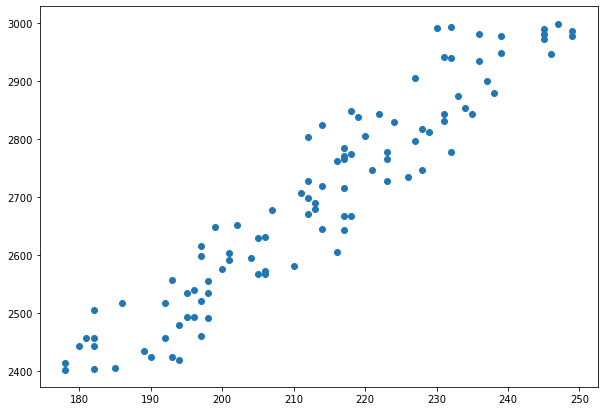

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.scatter(x = cl['food'], y = cl['weight'])
plt.show()

In [106]:
# K-Measn 군집 알고리즘 수행을 위한 함수 불러오기
from sklearn.cluster import KMeans

In [107]:
cl_n = cl.iloc[:,1:3].values

In [108]:
# 연속형 데이터만으로 군집 실행
cl_kmc = KMeans(n_clusters = 3).fit(cl_n)

In [109]:
# 군집결과 확인
cl_kmc.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2])

In [110]:
# 군집별 갯수 확인
import numpy as np
np.unique(cl_kmc.labels_, return_counts = True)

(array([0, 1, 2]), array([35, 38, 27], dtype=int64))

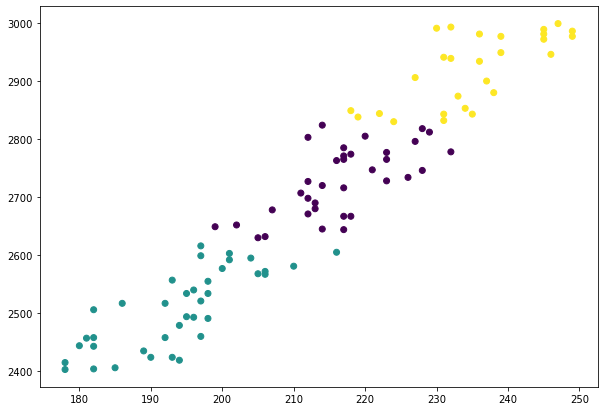

In [111]:
plt.figure(figsize = (10,7))
plt.scatter(x = cl['food'], y = cl['weight'], c = cl_kmc.labels_)
plt.show()